## Shashwat Jha

In [1]:
#Importing all the necessary libraries and modules 
import pandas as pd
import re 
import nltk 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import recall_score, precision_score, f1_score

In [2]:
#Reading the csv file using pandas
df = pd.read_csv("flipkart.csv")

In [3]:
#To view the frist five rows of the dataframe
df.head()

uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4  bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/fabhomedecor-fabric-do...   
2  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/sicons-all-purpose-arn...   

                            product_name  \
0    Alisha Solid Women's Cycling Shorts   
1    FabHomeDecor Fabric Double Sofa Bed   
2                             AW Bellies   
3    Alisha Solid Women's Cycling Shorts   
4  Sicons All Purpose Arnica Dog Shampoo   

                               product_category_tree               pid  \
0  ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2FF9KEDEFGF   
1  ["Furniture >> Living Room Furniture >> Sofa B...  SBEEH3QGU7MFYJFY   
2  ["Footwear >> Women's Footwear >> Ballerinas >...  SHOEH4GRSUBJGZXE   
3  ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2F6HUZMQ6SJ   
4  ["Pet Supplies >> Grooming >> Skin & Coat Care...  PSOEH3ZYDMSYARJ5   

   retail_price  discounted_price  \
0         999.0             379.0   
1       32157.0           22646.0   
2         999.0             499.0   
3         699.0             267.0   
4         220.0             210.0   

                                               image  is_FK_Advantage_product  \
0  ["http://img5a.flixcart.com/image/short/u/4/a/...                    False   
1  ["http://img6a.flixcart.com/image/sofa-bed/j/f...                    False   
2  ["http://img5a.flixcart.com/image/shoe/7/z/z/r...                    False   
3  ["http://img5a.flixcart.com/image/short/6/2/h/...                    False   
4  ["http://img5a.flixcart.com/image/pet-shampoo/...                    False   

                                         description       product_rating  \
0  Key Features of Alisha Solid Women's Cycling S...  No rating available   
1  FabHomeDecor Fabric Double Sofa Bed (Finish Co...  No rating available   
2  Key Features of AW Bellies Sandals Wedges Heel...  No rating available   
3  Key Features of Alisha Solid Women's Cycling S...  No rating available   
4  Specifications of Sicons All Purpose Arnica Do...  No rating available   

        overall_rating         brand  \
0  No rating available        Alisha   
1  No rating available  FabHomeDecor   
2  No rating available            AW   
3  No rating available        Alisha   
4  No rating available        Sicons   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Number of ...  
1  {"product_specification"=>[{"key"=>"Installati...  
2  {"product_specification"=>[{"key"=>"Ideal For"...  
3  {"product_specification"=>[{"key"=>"Number of ...  
4  {"product_specification"=>[{"key"=>"Pet Type",...

In [4]:
#Outputs the number of rows and columns in the daqtaframe
df.shape

(20000, 15)

In [5]:
#Name of all the columns in our dataframe
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [6]:
#Ouputs the statistical features of only numerical columns
df.describe()

retail_price  discounted_price
count   19922.000000      19922.000000
mean     2979.206104       1973.401767
std      9009.639341       7333.586040
min        35.000000         35.000000
25%       666.000000        350.000000
50%      1040.000000        550.000000
75%      1999.000000        999.000000
max    571230.000000     571230.000000

In [7]:
#Used to ouput total number of non-null values in each row, data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In this task we will take the "description" column as our main feature.<br>
We can see that we have two null values in description column, in the codeblock below we are trying to get the index of these two instances.

In [8]:
df[df['description'].isnull()].index

Int64Index([553, 17299], dtype='int64')

In [9]:
#Printing out the description of the index 553 , 17299
print(df['description'][553])
print(df['description'][17299])

nan
nan


If we have decided to take description column as the main feature, we can drop the above two mentioned instances from our data frame as it doesn't have any description and thus it can't be used for either training or testing our model. 

In [10]:
df.drop([553, 17299] , inplace = True)

In [11]:
# We have dropped two rows
df.shape

(19998, 15)

In [12]:
#Let's print out one random description to see what does our features look like 
print(df['description'][37])

Specifications of Pick Pocket Embroidered Women's Waistcoat General Details Pattern Embroidered Occasion Casual Ideal For Women's Waistcoat Details Lining Polyester Fabric Bengal Silk Additional Details Style Code TL-012 Fabric Care First Time Dry Clean


We see that there are many characters in the description which are not useful for us. Thus the next step that we adopt is of cleaning the strings of the desription column. We can clean these strings with the help of *regex* library.

In [13]:
def preprocessing_string(str_arg):
    '''
    input: str_arg --> Takes string to clean
    output: cleaned_str --> Gives back cleaned string
    This fuction cleans the text in the mentioned ways as comments after the line.This has been copied from some other kernel.

    '''
    cleaned_str=re.sub('[^a-z\s]+',' ',str_arg,flags=re.IGNORECASE) #every char except alphabets is replaced
    cleaned_str=re.sub('(\s+)',' ',cleaned_str) #multiple spaces are replaced by single space
    cleaned_str=cleaned_str.lower() #converting the cleaned string to lower case
    
    return cleaned_str # Returning the preprocessed string in tokenized form

In [14]:
'''
    Lets see how our string look after we appply the "preprocessing_string" function on it.
'''
print(df["description"][0])
print('\n')
print(preprocessing_string(df["description"][0]))

Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts


key features of alisha solid women s cycling shorts cotton lycra navy red navy specifications of alisha solid women s cycling shorts shorts details number of contents in sales package pack of fabric cotton lycra type cycling shorts general details pattern solid ideal for women s fabric care gentle machine wash in lukewarm water do not bleach additional details style code altht p in the box shorts


As mentioned in the task, the main goal is to find the category of product. The "product_category_tree" column in dataframe is our target.<br>

In [15]:
#lets look at the product_category_tree column
df['product_category_tree']

0        ["Clothing >> Women's Clothing >> Lingerie, Sl...
1        ["Furniture >> Living Room Furniture >> Sofa B...
2        ["Footwear >> Women's Footwear >> Ballerinas >...
3        ["Clothing >> Women's Clothing >> Lingerie, Sl...
4        ["Pet Supplies >> Grooming >> Skin & Coat Care...
                               ...                        
19995    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19996    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19997    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19998    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19999    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 19998, dtype: object

We can see that there are numerous categories in the dataframe, also we can notice that in each category there are some sub categories, as per the task requirement we only need focus on the "main" or so called "parent" categories.<br>
For this purpose we need to process these categories in order to extract the "main" category of the product.

In [16]:
# Category processing. (Check data to understand)
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : x.split('>>')[0][2:].strip())

In [17]:
#lets look at some of the main categories extracted by the help of the lambda, split and strip.
print(df['product_category_tree'][50])
print(df["product_category_tree"][0])

Vishudh Printed Women's Straight Kurta"]
Clothing


In [18]:
#Total number of uniques "parent"
df['product_category_tree'].nunique()

266

In [19]:
#Printing out all the unique categories
df['product_category_tree'].unique()

array(['Clothing', 'Furniture', 'Footwear', 'Pet Supplies',
       'Eternal Gandhi Super Series Crystal Paper Weight..."]',
       'Pens & Stationery', 'Sports & Fitness',
       'Beauty and Personal Care',
       'Bengal Blooms Rose Artificial Plant  with Pot (3..."]',
       'Bags, Wallets & Belts', 'Home Decor & Festive Needs',
       'Automotive', 'Tools & Hardware',
       'Vishudh Printed Women\'s Straight Kurta"]',
       'Vishudh Printed Women\'s Anarkali Kurta"]',
       'BuildTrack PIR Wireless Motion Sensor - One Swit..."]',
       'Skayvon SUMMERSIBLE SINGLE PHASE PUMP CONTROLLER..."]',
       'MASARA Solid Women\'s Straight Kurta"]',
       'Skayvon SUBMERSIBBLE THREE PHASE PUMP CONTROLLER..."]',
       'Behringer Xenyx 502 Analog Sound Mixer"]',
       'Noor Embroidered Women\'s Straight Kurta"]',
       'Libas Printed Women\'s A-line Kurta"]',
       'Libas Printed Women\'s Anarkali Kurta"]', 'Home Furnishing',
       'Baby Care', 'Mobiles & Accessories', 'Food & Nutriti

As we can notice there are many examples where the product doesn't have a definite category.<br>
For example instead of categorising the product under clothing, it's rather filled the product detail as the category.<br>
See the code cell below.

In [20]:
print(df['product_category_tree'][50])

Vishudh Printed Women's Straight Kurta"]


In order to prevent such instances where the product category is not definite we will chose only those categories which have a definite property such as clothing, footwear, camera and acessories etc

In [21]:
# Taking only top categories
top_cat = list(df.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(28).index)

In [22]:
print(top_cat)

['Clothing', 'Jewellery', 'Footwear', 'Mobiles & Accessories', 'Automotive', 'Home Decor & Festive Needs', 'Beauty and Personal Care', 'Home Furnishing', 'Kitchen & Dining', 'Computers', 'Watches', 'Baby Care', 'Tools & Hardware', 'Toys & School Supplies', 'Pens & Stationery', 'Bags, Wallets & Belts', 'Furniture', 'Sports & Fitness', 'Cameras & Accessories', 'Home Improvement', 'Health & Personal Care Appliances', 'Sunglasses', 'Gaming', 'Pet Supplies', 'Home & Kitchen', 'Home Entertainment', 'eBooks', 'Eyewear']


In [23]:
# Selecting only relevant columns
processed_df = df[df['product_category_tree'].isin(top_cat)][['product_category_tree','description']]

In [24]:
processed_df

product_category_tree                                        description
0                  Clothing  Key Features of Alisha Solid Women's Cycling S...
1                 Furniture  FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2                  Footwear  Key Features of AW Bellies Sandals Wedges Heel...
3                  Clothing  Key Features of Alisha Solid Women's Cycling S...
4              Pet Supplies  Specifications of Sicons All Purpose Arnica Do...
...                     ...                                                ...
19995             Baby Care  Buy WallDesign Small Vinyl Sticker for Rs.730 ...
19996             Baby Care  Buy Wallmantra Large Vinyl Stickers Sticker fo...
19997             Baby Care  Buy Elite Collection Medium Acrylic Sticker fo...
19998             Baby Care  Buy Elite Collection Medium Acrylic Sticker fo...
19999             Baby Care  Buy Elite Collection Medium Acrylic Sticker fo...

[19661 rows x 2 columns]

In the code cell below we are plotting a bar plot to show which category has maximum number of product.<br>
We should notice that the total no. of products will not be equal to 20,000 as we have removed some rows from our original dataset as mentioned in the above cells<br>

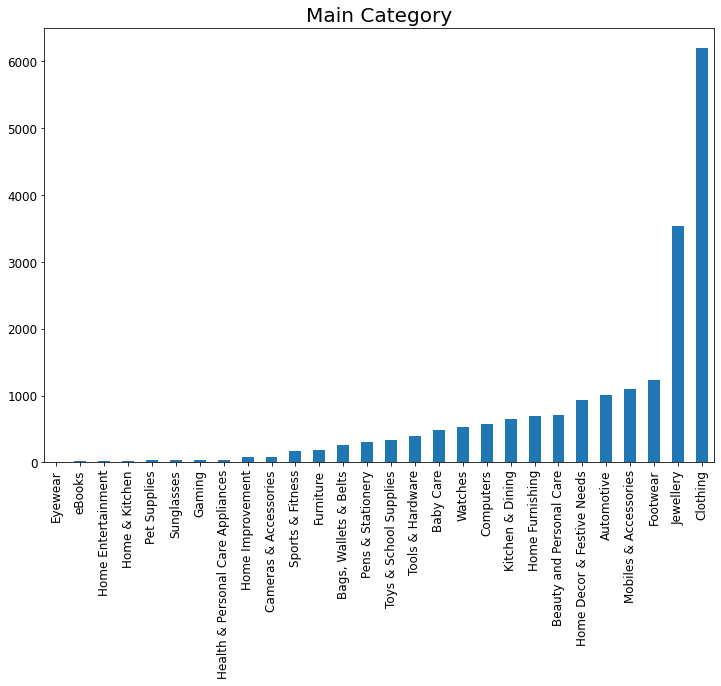

Top Main Categories by Sales.

Clothing                             6197
Jewellery                            3531
Footwear                             1227
Mobiles & Accessories                1099
Automotive                           1012
Home Decor & Festive Needs            929
Beauty and Personal Care              710
Home Furnishing                       699
Kitchen & Dining                      647
Computers                             578
Watches                               530
Baby Care                             483
Tools & Hardware                      391
Toys & School Supplies                330
Pens & Stationery                     313
Bags, Wallets & Belts                 265
Furniture                             180
Sports & Fitness                      166
Cameras & Accessories                  82
Home Improvement                       81
Health & Personal Care Appliances      43
Gaming                                 35
Sunglasses                             35
Pet

In [25]:
plt.figure(figsize=(12,8))
df['product_category_tree'].value_counts()[:28].sort_values(ascending=True).plot(kind='bar')
plt.title('Main Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
print('Top Main Categories by Sales.\n')
print(df['product_category_tree'].value_counts()[:28])

In [26]:
## Cleaning strings
processed_df['description'] = processed_df['description'].astype('str').apply(preprocessing_string)

In [27]:
processed_df

product_category_tree                                        description
0                  Clothing  key features of alisha solid women s cycling s...
1                 Furniture  fabhomedecor fabric double sofa bed finish col...
2                  Footwear  key features of aw bellies sandals wedges heel...
3                  Clothing  key features of alisha solid women s cycling s...
4              Pet Supplies  specifications of sicons all purpose arnica do...
...                     ...                                                ...
19995             Baby Care  buy walldesign small vinyl sticker for rs onli...
19996             Baby Care  buy wallmantra large vinyl stickers sticker fo...
19997             Baby Care  buy elite collection medium acrylic sticker fo...
19998             Baby Care  buy elite collection medium acrylic sticker fo...
19999             Baby Care  buy elite collection medium acrylic sticker fo...

[19661 rows x 2 columns]

In [28]:
# Creating a list of categories for later use
cat_list = list(processed_df['product_category_tree'].unique())

In [29]:
# Printing the list of top categories
print(cat_list)

['Clothing', 'Furniture', 'Footwear', 'Pet Supplies', 'Pens & Stationery', 'Sports & Fitness', 'Beauty and Personal Care', 'Bags, Wallets & Belts', 'Home Decor & Festive Needs', 'Automotive', 'Tools & Hardware', 'Home Furnishing', 'Baby Care', 'Mobiles & Accessories', 'Watches', 'Toys & School Supplies', 'Jewellery', 'Kitchen & Dining', 'Home & Kitchen', 'Computers', 'Cameras & Accessories', 'Health & Personal Care Appliances', 'Gaming', 'Home Improvement', 'Sunglasses', 'Home Entertainment', 'Eyewear', 'eBooks']


In [30]:
# Encoding the product category
le = preprocessing.LabelEncoder()
category_encoded=le.fit_transform(processed_df['product_category_tree'])
processed_df['product_category_tree'] = category_encoded

In [31]:
#Printing the encoded value and their corresponding values
for i in range(28):
    print(str(i) + "-" + le.inverse_transform([i]))

['0-Automotive']
['1-Baby Care']
['2-Bags, Wallets & Belts']
['3-Beauty and Personal Care']
['4-Cameras & Accessories']
['5-Clothing']
['6-Computers']
['7-Eyewear']
['8-Footwear']
['9-Furniture']
['10-Gaming']
['11-Health & Personal Care Appliances']
['12-Home & Kitchen']
['13-Home Decor & Festive Needs']
['14-Home Entertainment']
['15-Home Furnishing']
['16-Home Improvement']
['17-Jewellery']
['18-Kitchen & Dining']
['19-Mobiles & Accessories']
['20-Pens & Stationery']
['21-Pet Supplies']
['22-Sports & Fitness']
['23-Sunglasses']
['24-Tools & Hardware']
['25-Toys & School Supplies']
['26-Watches']
['27-eBooks']


In [32]:
processed_df.head()

product_category_tree                                        description
0                      5  key features of alisha solid women s cycling s...
1                      9  fabhomedecor fabric double sofa bed finish col...
2                      8  key features of aw bellies sandals wedges heel...
3                      5  key features of alisha solid women s cycling s...
4                     21  specifications of sicons all purpose arnica do...

We have taken only those products which have a definite categories.<br>
In the code cell below we can notice the change in the shape of our dataframe.

In [33]:
#Shape of processed_df
processed_df.shape

(19661, 2)

In [34]:
'''
This code block is for spliting train test data

We are splitting our dataset as follows:
Training Data - 80%
Testing Data  - 20%

'''
X_train, X_test, y_train, y_test = train_test_split(processed_df['description'],processed_df['product_category_tree'],test_size=0.2)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15728,)
(3933,)
(15728,)
(3933,)


Let's look at the our training features

In [36]:
print(X_train.head())

5509     fab flash fire retrardant pvc sq mm yellow m w...
10076    clovia padded women s plunge bra buy nile blue...
19558    miss chase women s high low dress buy navy and...
7341     flipkart com buy dolphin gallery no no art pla...
10145    key features of debock xiaomi mi tempered glas...
Name: description, dtype: object


Let's look at our training labels

In [37]:
print(y_train.head())

5509     24
10076     5
19558     5
7341     20
10145    19
Name: product_category_tree, dtype: int32


Scikit-learn’s CountVectorizer is used to transform a corpora of text to a vector of term / token counts. It also provides the capability to preprocess your text data prior to generating the vector representation making it a highly flexible feature representation module for text.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html<br>
https://developers.google.com/machine-learning/guides/text-classification/step-3#vectorization

In [38]:
'''
This code block is for converting the training data to vectorized form

'''
# Instantiating the vectorizer and removing stop words
vect = CountVectorizer(analyzer='word', stop_words = 'english')
# Converting the train data
X_train_matrix = vect.fit_transform(X_train) 

In [39]:
# vect.get_feature_names()
X_train_matrix.shape

(15728, 17533)

rows x columns<br>
document = rows<br>
term = columns<br>

In [40]:
vect.vocabulary_

{'fab': 5392,
 'flash': 5797,
 'retrardant': 12856,
 'pvc': 12209,
 'sq': 14610,
 'mm': 9850,
 'yellow': 17363,
 'wire': 17125,
 'price': 11938,
 'rs': 13147,
 'isi': 7855,
 'marked': 9415,
 'house': 7224,
 'ec': 4698,
 'grade': 6576,
 'copper': 3341,
 'virgin': 16682,
 'resin': 12801,
 'cable': 2171,
 'comes': 3049,
 'guage': 6690,
 'wiring': 17131,
 'lasts': 8657,
 'longer': 9056,
 'specifications': 14487,
 'performance': 11316,
 'features': 5579,
 'current': 3652,
 'carrying': 2344,
 'capacity': 2266,
 'overall': 10905,
 'diameter': 4131,
 'voltage': 16766,
 'length': 8799,
 'nominal': 10481,
 'area': 806,
 'conductor': 3191,
 'insulation': 7721,
 'thickness': 15598,
 'general': 6305,
 'brand': 1897,
 'suitable': 15027,
 'industrial': 7584,
 'domestic': 4400,
 'commercial': 3077,
 'type': 16186,
 'stranded': 14839,
 'shade': 13710,
 'model': 9881,
 'material': 9480,
 'electrolytic': 4810,
 'color': 3000,
 'box': 1849,
 'additional': 218,
 'certification': 2497,
 'mark': 9414,
 'clov

In [41]:
'''
This code block is for training vectorized data

'''
# Instantiate a Multinomial Naive Bayes model
model=MultinomialNB()

# Train the model
model.fit(X_train_matrix, y_train)

# Scoring the trained model
print("Accuracy of model on training data:" , model.score(X_train_matrix, y_train))

Accuracy of model on training data: 0.950851983723296


In [42]:
'''
This code block is for predicting & scoring test data

'''

# Converting the test data
X_test_matrix = vect.transform(X_test) 

# Scoring for the test data
print ("Accuracy of model on testing data:", model.score(X_test_matrix, y_test))

Accuracy of model on testing data: 0.9288075260615306


In [43]:
'''
Time taken by our model for traing 
'''
%time model.fit(X_train_matrix, y_train)

Wall time: 170 ms


MultinomialNB()

In [44]:
# Printing score 
predicted_result=model.predict(X_test_matrix)
print(classification_report(y_test,predicted_result))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       209
           1       0.80      0.61      0.70        93
           2       0.91      0.56      0.70        55
           3       0.75      0.90      0.82       145
           4       1.00      0.14      0.25        21
           5       0.99      0.98      0.99      1224
           6       0.81      0.76      0.78       120
           7       1.00      1.00      1.00         2
           8       0.96      0.97      0.97       232
           9       0.88      1.00      0.94        36
          10       0.86      0.55      0.67        11
          11       1.00      0.50      0.67         8
          12       1.00      0.50      0.67         6
          13       0.89      0.97      0.93       196
          14       0.00      0.00      0.00         3
          15       0.92      0.99      0.95       134
          16       1.00      0.35      0.52        20
          17       0.89    

c:\users\vaishnavi jha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vaishnavi jha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vaishnavi jha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

Now we will used TfidfVectorizer  and compare the accuracy of models on the basis of method of vectorization<br>
We can see clearly that Count Vectorizer give number of frequency with respect to index of vocabulary where as tf-idf consider overall documents of weight of words.<br>
Medium article on TfidfVectorizer- https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a<br>
Scikit learn documentation- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [45]:
'''
This code block is for converting the training data to Tf-Idf form

'''
# Removing stop words
vectorizer = TfidfVectorizer(analyzer = 'word' , stop_words = 'english')
# Converting the train data
X_train_tfidf = vectorizer.fit_transform(X_train)

In [46]:
'''
This code block is for training

'''
# Instantiate a Multinomial Naive Bayes model
model2=MultinomialNB()

# Fitting to multinomial NB model
model2.fit(X_train_tfidf, y_train)

# Scoring the trained model (Expected to be above 95 percent)
print("Accuracy of model on training data:" , model2.score(X_train_tfidf, y_train))

Accuracy of model on training data: 0.8824389623601221


In [47]:
'''
This code block is for predicting & scoring test data

'''
# Converting the test data
X_test_tfidf = vectorizer.transform(X_test) 

# Printing score
print ("Accuracy of model on testing data:" , model2.score(X_test_tfidf, y_test))

Accuracy of model on testing data: 0.8660055936943809


We used two vectorizer here, CountVectorizer and TfidfVectorizer, and out of these two vectorizer we can observe that the CountVectorizer performed better than TfidfVectorizer.<br>
We will use "model" to predict the product category in the following clode cells

In [48]:
nr_correct = (y_test == model.predict(vect.transform(X_test))).sum()

In [49]:
print("Out of ", X_test.shape ,"target categories, the model predicted", nr_correct, "categories correctly")

Out of  (3933,) target categories, the model predicted 3653 categories correctly


In [50]:
X_test

11547    xtreme mb windtone for tvs pep plus db vehicle...
8221     easy gardening home plant container set pack o...
9086     times times formal analog watch for women girl...
4845     vr designers glass necklace buy vr designers g...
11274    getabhi striped tie buy black sky blue getabhi...
                               ...                        
744      faballey casual short sleeve solid women s top...
14549    ocean race graphic print men s round neck t sh...
14139    okane printed men s round neck t shirt buy bla...
8209     flipkart com buy brood women flats only for rs...
4217     zakaah jewels sterling silver plated stone nec...
Name: description, Length: 3933, dtype: object

In [51]:
test_desc = X_test[11274]
test_desc

'getabhi striped tie buy black sky blue getabhi striped tie for only rs online in india shop online for apparels huge collection of branded clothes only at flipkart com'

In [52]:
'''
Testing Block: Test your string
'''
le.inverse_transform(model.predict(vect.transform([test_desc])))

array(['Clothing'], dtype=object)